In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('Resources/cleaned_byarea_df.csv', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load smoking_rate.csv file
smoking_df = pd.read_csv('Resources/smoking_rate.csv')
smoking_df

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1
3,Arkansas,27.0,25.0,25.9,24.7,24.9,23.6,22.3,22.7,20.2,21.1
4,California,13.7,12.6,12.5,12.9,11.7,11.0,11.3,11.2,10.0,8.8
5,Colorado,18.3,17.7,17.7,15.7,15.7,15.6,14.6,14.5,13.5,12.0
6,Connecticut,17.1,16.0,15.5,15.4,13.5,13.4,12.7,12.2,12.1,11.1
7,Delaware,21.8,19.7,19.6,19.9,17.4,17.7,17.0,16.5,15.9,13.4
8,District of Columbia,20.8,19.6,18.8,16.4,16.0,14.7,14.4,13.8,12.7,9.5
9,Florida,19.3,17.7,16.8,17.7,15.8,15.5,16.1,14.5,14.8,14.7


## prepare smoking data

In [5]:
# reshape smoking_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
smoking_df.rename(columns={'2011':'smoking_2011',
                           '2012':'smoking_2012',
                           '2013':'smoking_2013',
                           '2014':'smoking_2014',
                           '2015':'smoking_2015',
                           '2016':'smoking_2016',
                           '2017':'smoking_2017',
                           '2018':'smoking_2018',
                           '2019':'smoking_2019',
                           '2020':'smoking_2020'}, inplace=True)

In [6]:
smoking_df.head()

,State,smoking_2011,smoking_2012,smoking_2013,smoking_2014,smoking_2015,smoking_2016,smoking_2017,smoking_2018,smoking_2019,smoking_2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1
3,Arkansas,27.0,25.0,25.9,24.7,24.9,23.6,22.3,22.7,20.2,21.1
4,California,13.7,12.6,12.5,12.9,11.7,11.0,11.3,11.2,10.0,8.8


In [7]:
# convert smoking_df to long format
smoking_long_df = pd.wide_to_long(smoking_df, 
                              stubnames=['smoking'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
smoking_long_df

,,smoking
State,YEAR,
Alabama,2011,24.3
Alaska,2011,22.9
Arizona,2011,19.3
Arkansas,2011,27.0
California,2011,13.7
...,...,...
West Virginia,2020,22.0
Wisconsin,2020,13.3
Wyoming,2020,16.4


In [8]:
# Adding back index for ease of merging later
smoking_long_df = smoking_long_df.reset_index()
smoking_long_df

,State,YEAR,smoking
0,Alabama,2011,24.3
1,Alaska,2011,22.9
2,Arizona,2011,19.3
3,Arkansas,2011,27.0
4,California,2011,13.7
...,...,...,...
525,West Virginia,2020,22.0
526,Wisconsin,2020,13.3
527,Wyoming,2020,16.4
528,Guam,2020,20.0


## prepare cancer data

In [9]:
# filter for rows for state lung cancer mortality rate by all sex and race 
state_lung_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']=='Male and Female') &
                              (c_byarea_df['RACE']=='All Races') &
                              (c_byarea_df['SITE']=='Lung and Bronchus') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
state_lung_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2575 to 933049
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA                   1071 non-null   object 
 1   AGE_ADJUSTED_CI_LOWER  1071 non-null   float64
 2   AGE_ADJUSTED_CI_UPPER  1071 non-null   float64
 3   AGE_ADJUSTED_RATE      1071 non-null   float64
 4   EVENT_TYPE             1071 non-null   object 
 5   POPULATION             1071 non-null   int64  
 6   RACE                   1071 non-null   object 
 7   SEX                    1071 non-null   object 
 8   SITE                   1071 non-null   object 
 9   YEAR                   1071 non-null   int64  
 10  CRUDE_CI_LOWER         1071 non-null   float64
 11  CRUDE_CI_UPPER         1071 non-null   float64
 12  CRUDE_RATE             1071 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 117.1+ KB


In [10]:
state_lung_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
2575,Alabama,60.2,64.8,62.5,Mortality,4430141,All Races,Male and Female,Lung and Bronchus,1999,62.0,66.8,64.4
2577,Alabama,61.9,66.6,64.2,Mortality,4452173,All Races,Male and Female,Lung and Bronchus,2000,64.2,69.0,66.6
2579,Alabama,60.3,64.9,62.6,Mortality,4467634,All Races,Male and Female,Lung and Bronchus,2001,62.8,67.6,65.2
2581,Alabama,61.3,65.9,63.5,Mortality,4480089,All Races,Male and Female,Lung and Bronchus,2002,64.3,69.2,66.7
2583,Alabama,62.7,67.3,65.0,Mortality,4503491,All Races,Male and Female,Lung and Bronchus,2003,66.6,71.5,69.0


In [11]:
# Pick out just the columns needed for our linear regression analysis
# CRUDE_RATE as the independent variable
state_lr_df = state_lung_df[['AREA', 'YEAR', 'AGE_ADJUSTED_RATE']]
state_lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2575 to 933049
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               1071 non-null   object 
 1   YEAR               1071 non-null   int64  
 2   AGE_ADJUSTED_RATE  1071 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [12]:
state_lr_df

,AREA,YEAR,AGE_ADJUSTED_RATE
2575,Alabama,1999,62.5
2577,Alabama,2000,64.2
2579,Alabama,2001,62.6
2581,Alabama,2002,63.5
2583,Alabama,2003,65.0
...,...,...,...
933039,Wyoming,2015,32.0
933043,Wyoming,2016,30.3
933045,Wyoming,2017,30.5
933047,Wyoming,2018,29.5


## prepare Linear Regression data

In [13]:
# merge the cancer df and income df using "State" & "Year"
lr_df = pd.merge(smoking_long_df, state_lr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
lr_df

,State,YEAR,smoking,AREA,AGE_ADJUSTED_RATE
0,Alabama,2011,24.3,Alabama,56.9
1,Alaska,2011,22.9,Alaska,50.4
2,Arizona,2011,19.3,Arizona,36.7
3,Arkansas,2011,27.0,Arkansas,61.2
4,California,2011,13.7,California,34.9
...,...,...,...,...,...
525,West Virginia,2020,22.0,NaN,NaN
526,Wisconsin,2020,13.3,NaN,NaN
527,Wyoming,2020,16.4,NaN,NaN
528,Guam,2020,20.0,NaN,NaN


In [14]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 529
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              530 non-null    object 
 1   YEAR               530 non-null    int64  
 2   smoking            529 non-null    float64
 3   AREA               459 non-null    object 
 4   AGE_ADJUSTED_RATE  459 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 24.8+ KB


In [15]:
# check to see what rows are missing data
# cancer dataset only goes to 2019 & a few missing smoking data points
lr_df[lr_df['AREA'].isnull()]

,State,YEAR,smoking,AREA,AGE_ADJUSTED_RATE
51,Guam,2011,30.5,NaN,NaN
52,Puerto Rico,2011,14.8,NaN,NaN
104,Guam,2012,25.8,NaN,NaN
105,Puerto Rico,2012,12.6,NaN,NaN
157,Guam,2013,26.5,NaN,NaN
...,...,...,...,...,...
525,West Virginia,2020,22.0,NaN,NaN
526,Wisconsin,2020,13.3,NaN,NaN
527,Wyoming,2020,16.4,NaN,NaN
528,Guam,2020,20.0,NaN,NaN


In [16]:
lr_df = lr_df.dropna()
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 474
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              458 non-null    object 
 1   YEAR               458 non-null    int64  
 2   smoking            458 non-null    float64
 3   AREA               458 non-null    object 
 4   AGE_ADJUSTED_RATE  458 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.5+ KB


In [39]:
# export linear regression data for visualization 
lr_df.to_csv('Resources/lung_smoking_lr.csv', sep=',', encoding='utf-8', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

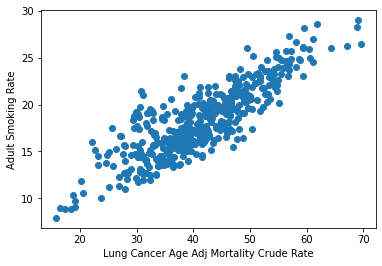

In [20]:
# plot of 458 raw data points
plt.scatter(lr_df.AGE_ADJUSTED_RATE, lr_df.smoking)
plt.xlabel("Lung Cancer Age Adj Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show

## Supervised ML - Linear Regression

In [21]:
X = lr_df.AGE_ADJUSTED_RATE.values.reshape(-1,1)
X.shape

(458, 1)

In [22]:
y = lr_df.smoking

In [23]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [24]:
y_pred = model.predict(X)
print(y_pred.shape)

(458,)


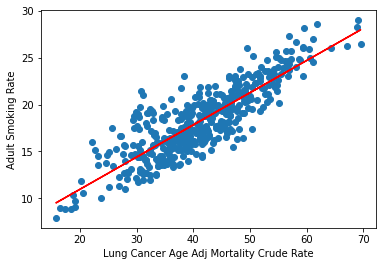

In [25]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Lung Cancer Age Adj Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show()

In [26]:
print(model.coef_)
print(model.intercept_)

[0.34370913]
4.08424541759107


In [27]:
r2_score(y, y_pred)

0.732527483280373

## Linear Regression ML model with split dataset

In [28]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# set up linear regression model with training dataset
s_model = LinearRegression()
s_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# fit X_train data to linear regression ML model
s_y_pred = s_model.predict(X_train)
len(s_y_pred)

343

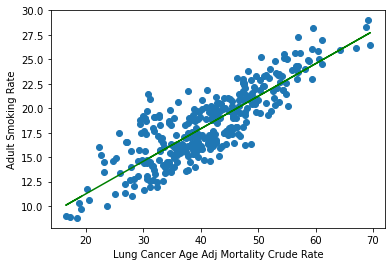

In [31]:
# plot regression data with training data
plt.scatter(X_train, y_train)
plt.plot(X_train, s_y_pred, color = 'green')
plt.xlabel("Lung Cancer Age Adj Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show()

In [32]:
# model intercept
# at 0% smoking rate, there will be 8 lung cancer death per 100,000
# 8 lung caner death per 100,000 cannot attribute to smoking
s_model.intercept_

4.61114986209169

In [33]:
# model coefficent
# every 0.2% decrease in smoking rate can lead to 1 less lung caner death per 100,000
s_model.coef_

array([0.33254081])

In [34]:
# training data R2
train_score = s_model.score(X_train, y_train)
train_score

0.7223075755491899

In [35]:
# obtain linear regression line using split data model and X_test data
s_y_test_pred = s_model.predict(X_test)
len(s_y_test_pred)

115

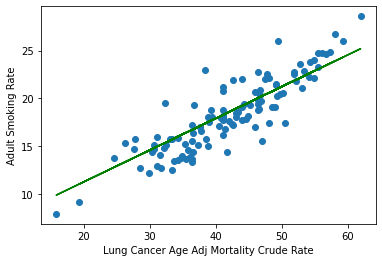

In [36]:
# plot regression data with testing data
plt.scatter(X_test, y_test)
plt.plot(X_test, s_y_test_pred, color = 'green')
plt.xlabel("Lung Cancer Age Adj Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show()

In [37]:
# R2 from testing data
test_score = s_model.score(X_test, y_test)
test_score

0.7572568179323721